In [38]:
import sys
sys.path.append("..")

import numpy as np
import os
import pandas as pd
from scipy.optimize import curve_fit
import timeit

%load_ext autoreload
%autoreload 2

from sicm.plots.plots import plot_generic
from sicm.models.model import Laser

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
Xs = []
Ys = []
data_dir = "S:\\UsersData\\Martin\\2019\\04_April\\12"
# data_dir = "/run/user/1000/gvfs/smb-share:server=itet-stor.ee.ethz.ch,share=mholub/sicm/UsersData/Martin/2019/05_May"
fname_base = "laser_calibration_00{}.csv"
for exp_num in range(1,4):
    fname = fname_base.format(exp_num)
    fpath = os.path.normpath(os.path.join(data_dir, fname))

    df = pd.read_csv(fpath, header = None, index_col = False, sep = ";", usecols = [0, 1, 2])
    df.columns = [x + " [" + y + "]" for x, y in zip(df.iloc[0, :].values, df.iloc[1, :].values)]
    df = df.drop([0, 1]).reset_index().astype(np.float)
    Xs.append(df["diode current [a.u.]"].values)
    Ys.append(df["avg power [mW]"].values)

In [40]:
# Diameters of colimated beam are taken from 04/12/laser_power_denisty/WP_20190410_014.jpg
d_collimated = np.mean([9.029, 9.213, 9.631, 9.138]) / 10 # in cm
A_collimated = np.pi * ((d_collimated / 2) ** 2)
d_focused = 50e-4 # taken from FWHM in model.ipynb
A_focused = np.pi * ((d_focused / 2) ** 2)
transmittance = 0.85 # from Zeiss objective specs

factor = A_collimated / A_focused * transmittance
factor *= 1e-9 # Convert milliwats to kW

Fitting _relu_fit to 14 datapoints ...
Found parameters: [ 0.03051456 -0.05501802].
Finished in 0.002 s
error on fit: 2.608267551E-04


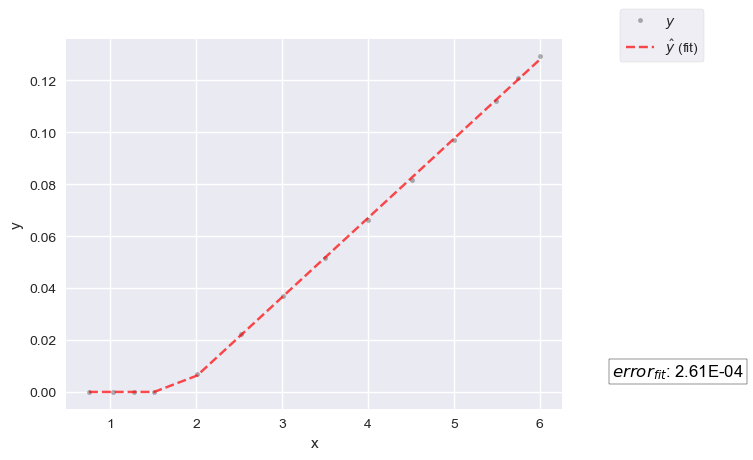

In [41]:
y = np.asarray(Ys[0][1:]) / A_collimated * factor
laser = Laser(np.asarray(Xs[0][1:]), y)
laser.fit_model()

Saved figure to S:\UsersData\Martin\2019\04_April\12\laser_calibration_003.pdf.


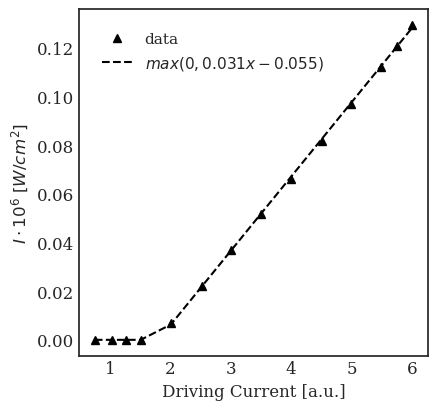

In [45]:
plot_generic([laser.x, laser.x], [laser.y, laser.fun(laser.x, *laser.popt)],
            ["Driving Current [a.u.]"], [r"$I\cdot 10^6\ [W/cm^2]$"],
            ["data", r"$max(0, {:.3f}x {:.3f})$".format(*laser.popt)],
            fmts = ["^k", "--k"],
            fname = fpath)

-------
### Not Used

Fitting _relu_fit to 44 datapoints ...
Found parameters: [  647.44451131 -1029.30551974].
Finished in 0.003 s
error on fit: 8.552577214E-02


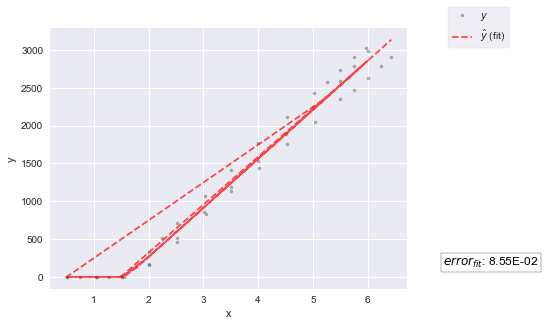

In [11]:
laser = Laser(np.concatenate(Xs), np.concatenate(Ys))
laser.fit_model()